# Predicting if Daily Revenue will Reach Daily Forecasted Revenue Using Machine Learning

Capstone Project for Springboard Intensive Data Science Course

Julianna Renaud

## The Project

Optimization of business decisions across the company are made based on the revenue forecast. Since revenue forecasts are the backbone to business decisions across the entire organization (how much inventory should I order, how many people do I need in department x to fulfill expected demand, how much money do I need to invest in advertising, etc.), failing to reach or exceed expectations can be detrimental to retailers. Creating an accurate revenue forecast is challenging for any retailer, and then followed by the additional challenge of understanding on a day to day basis if you over or under-forecasted. Retailers are making decisions daily regarding merchandising, marketing plans and marketing spend. As a digital marketing agency, our clients enlisting our services to produce and execute on strategies to reach and exceed these goals. Our job is to make accurate assessments of performance, set appropriate expectations, as well as to maximize digital marketing campaigns for our clients to achieve their goals.

This project investigates the use of machine learning to predict whether or not the client is likely to reach their daily forecasted eCommerce business revenue goal based on historical perfomance and their marketing calendar. This prediction is intended to provide the client's marketing teams with enough advance notice to be able to modify the marketing plan/calendar if necessary to reach forecasting revenue.


## The Client

*For confidentiality purposes, the name of this client will remain anonymous. The client will be referred to as “the Client” throughout.*


The client for this project is a women’s fashion retailer selling a variety of product categories such as clothing, shoes, and jewelry with their primary sales around their handbag product line. While the brand owns and operates a handful of full-price and outlet retail stores as well as selling merchandise through third party retailers, this project focuses on predicting whether the client will achieve their goal for their eCommerce business.

This client is publicly owned and operated. At the beginning of each year, the Executive Level Management team releases their annual forecast projections for the eCommerce division of the company broken down by month. The marketing team for the eCommerce division utilizes this information to create their own set of daily goals and their marketing plan for each month. They then work with an agency partner to help strategize and execute these marketing plans to reach these goals.


## The Data

Historical website performance data was pulled from the client's Google Analytics (GA) account. The data pulled covered a wide range of audience, acquisition, behavior and conversion website performance metrics. Data was pulled for the website overall in addition to broken down by marketing channel as well as another version broken down by device type.

Additionally, the client provided the following historical data:
* Paid advertising spend by channel
* Daily goals (revenue, orders, units, traffic)
* The marketing calendar (which included details on promotions/events, new arrivals as well as their email calendar)


## Methodology

This project was treated as a supervised learning classification problem. The binary variable 'Goal Reached' indicates whether or not the client reached their revenue goal on a specific date.

### Libraries:

* matplotlib for: data visualization
* numpy for: array data structure, mathmatical/statistical analysis
* pandas for: data loading, wrangling, cleaning and manipulation, descriptive statistics
* scikit-learn for: machine learning, model evaluation
* scipy for: statistical analysis
* seaborn for: data visualization


### Data Wrangling and Cleaning

The data came in the form of CSV files which were loaded into pandas dataframes. 

Date fields required proper formatting. In one instance, the marketing channel came in with two versions of the name and the names needed to be updated and rows of data consolidated. Two of the files required pivoting to create a single row for each date. 

NaN fields were handled by filling in with a 0 since the instance of NaN in the GA data files were indicative of no performance on that particular day for that particular marketing channel or device type.

In order to gauge the impact of specific marketing events, I leveraged the existing of specific text in the marketing calendar and event file to create several binary columns for each type of marketing event.

Created a new column, 'Avg. Seesion Duration Seconds' by reformatting the original 'Average Session Duration' column from 0:00:00 format into a sum of seconds.

The pandas shift() function was leveraged to shift historical GA data forward by 1 and 364 days. 364 was selected because that shifted the data forward by one fiscal calendar year so that data was shifted to the same day of the week as the previous year since day of week can have significant impact on eCommerce retail performance. Additionally, Users (web traffic) was summed for the last seven days and divided by seven for an average daily traffic over the last several days.

The shift() function was utilized to shift paid media spend data forward by 1 and 364 days. Rather than keeping the spend separated by channel, the historical data that was shifted was summed for a total spend yesterday and a total spend 364 days ago since the total spend is likely to be similar YoY, but the channel allocation of spend may have changed. Ideally, a daily budget for future dates would have been a nice addition to the dataset, but future budget was not available, so this approach was utilized in the absence of the budget.

Additional columns were created to document whether or not the client achieved their goal (Revenue, Users, Orders, Units, AOV and CVR. That was then shifted forward 1 day. 

After all data wrangling and cleaning was performed on each of the five individual files, the files were then joined together into a single dataset.

Once the revenue data from GA was combined with the forecast data provided by the client, a binary column, 'Goal Reached' was created based on if revenue was greater than or equal to the revenue forecasted for the day. This binary column was then shifted forward 

### EDA

Purpose: Gain insight into the final dataset to begin to understand the following:
* Uncover the underlying structure of the data
* The percentage of the dates the client reached or exceeded their goal
* Identify if any outliers or anomalies exist in the data and why
* Begin to understand the type of impact (if any) that various marketing events and email campaigns may have on revenue and traffic.

Overview of Tasks Performed:
* Identified the percentage of days the client reached or exceeded goal
* Analyzed data to identify trends (highs, lows, increases, decreases, anomalies)
* Identified and removed outlier from the final dataset. This was Cyber Monday since only one Cyber Monday event was present in the dataset. Should additional data ever be available that would begin to illustrate an annual pattern on this day then Cyber Monday would be added back into the dataset. 
* Computed statistical analysis on the final dataset
* Explored the impact of email and marketing events on revenue


### Feature Selection and Engineering

Historical web site performance data that had been shifted were selected as features. This included Users from the previous day as well as an average from the last seven days. Users were selected because there is generally a high correlation between website traffic and revenue. Additionally, users, bounce rate, pages/session and average session duration (in seconds) from the same fiscal day the previous year were utilized. Additional binary features were created based on the client's marketing/promotional calendar. Binary features were included to indicate if the whether or not the client sent an email to their database that day, as well as specific sale events and new arrivals. These were included because email drives significant traffic to the site and marketing events tend to encourage conversion on site. Binary features were also created to indicate if the client achieved their goals the previous day. These were included as they may be indications that the site is underperforming to plan.

### Model Fitting

* K Nearest Neighbors 
* Logistic Regression (LR)
* Multinomial Naive Bayes
* Decision Tree Classifier
* Gaussian NB
* Linear Discriminant Analysis (LDA)


### Model Evaluation

The data was split into test (20%) and training (80%) sets. The split size was determined based on the smaller size of the dataset and wanting to train on as much of the data as possible. 

Models were compared based on accuracy, ROC AUC scores, their confusion matrix and classification reports. While accuracy is important and our goal is to be more accurate than their current process, accuracy isn't the only important metric when determining the best model. Since the purpose of the model is to provide advance notice to the marketing team if the client is not predicted to reach their revenue goal, we do not want a high number of false positives. If the model too frequently predicts that they will reach their goal when they will not, the marketing team will not be provided with the advance warning necessary to make changes to their strategies in an effort to reach their goal.

Cross-validation was also run for each model to ensure that the models performance would not vary wildly with different datasets.


## Results

Without machine learning, the client reached their daily revenue forecast 68% of the time.



## Limitations

Plan data was only provided as far back as 12/4/2016 (the start of fiscal December 2016). This limited the the dataset to just over one full year of data. Since fashion retail is significantly impacted by seasonality, this was a limitation in allowing the model to learn how seasonality may impact revenue. 


## Further Action

Additional work can be done to improve and implement this model for the client:
* Acquire additional historical plan data so that the model so that the model had additional datapoints to train.
* If additional historical plan data is acquired then there may be a need to acquire additional historical media spend data (the current dataset goes back to 1/1/16).
* Discussions with the client to determine if there are additional marketing, or site optimization efforts that have significant impact on achieving revenue goals that could be included within the model to improve performance.
* Initiate an automated process to pull data from the Google Analytics API daily and push the data into the model for daily updates.
* Initiate an automated process to update the client's plan data and spend data. The frequency of this process will require the client's support and commitment as these numbers were provided by the client.
* Leverage the client's Business Intelligence platform to visualize the model's predictions. This would make the predicitions visible to the client's key stakeholders for taking action on the predictions.


## Client Recommendations



# Code

In [1]:
#Import Modules Necessary
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#Assign each file a variable name
file1 = 'GA_RevTranSessUser.csv'
file2 = 'GA_ChannelRevUsersTrans.csv'
file3 = 'GA_DeviceRevUsersTrans.csv'
file4 = 'DailyPlan.csv'
file5 = 'Media Spend.csv'

#Import each file
ga1_df = pd.read_csv(file1)
ga2_df = pd.read_csv(file2)
ga3_df = pd.read_csv(file3)
dailyplan_df = pd.read_csv(file4, encoding= "ISO-8859-1")
mediaspend_df = pd.read_csv(file5)

#Format the Date column for each file into the correct Date format
ga1_df['Date'] = pd.to_datetime(ga1_df['Date'], format='%Y%m%d')
ga2_df['Date'] = pd.to_datetime(ga2_df['Date'], format='%Y%m%d')
ga3_df['Date'] = pd.to_datetime(ga3_df['Date'], format='%Y%m%d')
dailyplan_df['Date'] = pd.to_datetime(dailyplan_df['Date'], format='%m/%d/%Y')
mediaspend_df['Date'] = pd.to_datetime(mediaspend_df['Date'], format='%m/%d/%Y')

#Check the date field format for each
print(ga1_df.info())
print(ga2_df.info())
print(ga3_df.info())
print(dailyplan_df.info())
print(mediaspend_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 10 columns):
Date                     758 non-null datetime64[ns]
Revenue                  758 non-null float64
Users                    758 non-null float64
Sessions                 758 non-null float64
Transactions             758 non-null float64
Quantity                 758 non-null float64
Bounces                  758 non-null float64
Pages / Session          758 non-null float64
Avg. Session Duration    758 non-null object
Session Duration         758 non-null object
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 59.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 5 columns):
Date                        4478 non-null datetime64[ns]
Default Channel Grouping    4478 non-null object
Users                       4478 non-null float64
Revenue                     4478 non-null float64
Transactions                4478 non-null

In [3]:
#ga2 included rows for both "Affiliates" and "Affiliate". Update occurances of "Affiliates" to "Affiliate"
ga2_df = ga2_df.replace({'Affiliates':'Affiliate'})

#ga2 now has multiple rows for the same date for Affiliate. Sum Users, Revenue & Transactions when two rows occur
ga2_df = ga2_df.groupby(['Date','Default Channel Grouping'])['Users', 'Revenue', 'Transactions'].sum().reset_index()

#Pivot the ga2, ga3 & media spend files so that there is a single row for each date
ga2_df = ga2_df.pivot(index='Date', columns=('Default Channel Grouping'))
ga3_df = ga3_df.pivot(index='Date', columns=('Device Category'))
mediaspend_df = mediaspend_df.pivot(index='Date', columns=('Channel'))
#print(ga2_df.info())
#print(ga3_df.info())
print(mediaspend_df.head())
print(dailyplan_df.info())

               Spend                                              
Channel    Affiliate     CSE  Display  PLA Paid Search Paid Social
Date                                                              
2016-01-01   9093.52  310.09  1222.32  0.0    24148.87     1871.12
2016-01-02   7844.25  522.61  1312.48  0.0    26192.79     1908.61
2016-01-03   7131.42  494.37  1418.63  0.0    26876.02     1931.49
2016-01-04   9670.25  371.78  1641.33  0.0    18381.37     1865.61
2016-01-05   5719.90  388.59  1942.57  0.0    16203.04     1514.85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
Date                              420 non-null datetime64[ns]
TY Event                          283 non-null object
TY Email                          274 non-null object
Daily Revenue Demand Plan         420 non-null int64
Daily Traffic Plan                420 non-null int64
Daily Net Shipped Revenue Plan    420 non-null int64
Orders Plan                    

In [4]:
#Replace NaN with 0
ga2_df = ga2_df.fillna(0)
ga2_df.info()
mediaspend_df = mediaspend_df.fillna(0)
mediaspend_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 394 entries, 2016-12-04 to 2018-01-01
Data columns (total 39 columns):
(Users, (Other))                  394 non-null float64
(Users, Affiliate)                394 non-null float64
(Users, CSE)                      394 non-null float64
(Users, Direct)                   394 non-null float64
(Users, Display)                  394 non-null float64
(Users, Email)                    394 non-null float64
(Users, Organic Search)           394 non-null float64
(Users, Organic Social)           394 non-null float64
(Users, Paid Search)              394 non-null float64
(Users, Paid Social)              394 non-null float64
(Users, Partnerships)             394 non-null float64
(Users, Referral)                 394 non-null float64
(Users, Social)                   394 non-null float64
(Revenue, (Other))                394 non-null float64
(Revenue, Affiliate)              394 non-null float64
(Revenue, CSE)                    394 non-null floa

In [5]:
#Data manipulation for the daily plan file

#Create binary column for email
dailyplan_df['Email Day'] = dailyplan_df['TY Email'].notnull().mul(1)

#Create a new column for promo type and extract the type of sale from TY Event
dailyplan_df['Promo Type'] = dailyplan_df['TY Event'].str.extract('(sale on sale|Sale on Sale|SOS|sos|markdowns|Markdowns|SS|Surprise Sale|surprise sale|ss|GWP|DOTD|DOD|New Arrivals|new arrivals|Friends & Family|friends & family|SWP|Employee Appreciation|employee appreciation)')

#Create binary column for each promo type, put 1 if occured 0 if not
dailyplan_df['SS'] = [1 if ele == 'surprise sale' or ele == 'ss' or ele == 'Surprise Sale' or ele == 'SS' else 0 for ele in dailyplan_df['Promo Type']]
dailyplan_df['MD'] = [1 if ele == 'Markdowns' or ele == 'markdowns' else 0 for ele in dailyplan_df['Promo Type']]
dailyplan_df['GWP'] = [1 if ele == 'GWP' else 0 for ele in dailyplan_df['Promo Type']]
dailyplan_df['FF'] = [1 if ele == 'Friends & Family' or ele == 'friends & family' else 0 for ele in dailyplan_df['Promo Type']]
dailyplan_df['DOTD'] = [1 if ele == 'DOD' or ele == 'DOTD' else 0 for ele in dailyplan_df['Promo Type']]
dailyplan_df['NA'] = [1 if ele == 'New Arrivals' or ele == 'new arrivals' else 0 for ele in dailyplan_df['Promo Type']]
dailyplan_df['SOS'] = [1 if ele == 'Sale on Sale' or ele == 'sale on sale'or ele == 'SOS' or ele == 'sos' else 0 for ele in dailyplan_df['Promo Type']]
dailyplan_df['SWP'] = [1 if ele == 'SWP' else 0 for ele in dailyplan_df['Promo Type']]
dailyplan_df['EA'] = [1 if ele == 'Employee Appreciation' or ele == 'employee appreciation' else 0 for ele in dailyplan_df['Promo Type']]
dailyplan_df['Sale Day'] = [1 if ele == 'surprise sale' or ele == 'ss' or ele == 'Surprise Sale' or ele == 'SS' or ele == 'Markdowns' or ele == 'markdowns' or ele == 'GWP' or ele == 'Friends & Family' or ele == 'friends & family' or ele == 'DOD' or ele == 'DOTD' or ele == 'Sale on Sale' or ele == 'sale on sale'or ele == 'SOS' or ele == 'sos' or ele == 'SWP' else 0 for ele in dailyplan_df['Promo Type']]

#Create calculated fields for AOV and CVR
dailyplan_df['AOV Plan'] = dailyplan_df['Daily Revenue Demand Plan']/dailyplan_df['Orders Plan']
dailyplan_df['CVR Plan'] = dailyplan_df['Orders Plan']/dailyplan_df['Daily Traffic Plan'] * 100

#Drop columns no longer necessary
dailyplan_df = dailyplan_df.drop(['TY Event', 'TY Email', 'Promo Type'], axis=1)

print(dailyplan_df.head())

        Date  Daily Revenue Demand Plan  Daily Traffic Plan  \
0 2016-12-04                    1830000              465923   
1 2016-12-05                     815591              275747   
2 2016-12-06                     744743              383480   
3 2016-12-07                     936497              329111   
4 2016-12-08                    1115910              373931   

   Daily Net Shipped Revenue Plan  Orders Plan  Units Plan  \
0                          944925      12607.0     17069.0   
1                         1239086       5972.0      8925.0   
2                          561874       5343.0      7488.0   
3                          467726       6880.0      9563.0   
4                          835736       8372.0     12144.0   

   Daily Margin $ Plan  Email Day  SS  MD  GWP  FF  DOTD  NA  SOS  SWP  EA  \
0               635025          1   0   0    0   0     1   0    0    0   0   
1               832713          0   0   0    0   0     0   0    0    0   1   
2             

C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  import sys


In [6]:
#Converting Avg. Session Duration to total Seconds
ga1_df['Avg. Session Duration'].astype('str')
ga_new_df = pd.DataFrame(ga1_df['Avg. Session Duration'].str.split(':').tolist(), columns='hours minutes seconds'.split()).astype('float')
ga_new_df['Hours to Seconds'] = ga_new_df['hours'] * 3600
ga_new_df['Min to Seconds'] = ga_new_df['minutes'] * 60
ga_new_df['Avg. Session Duration Seconds'] = ga_new_df['Hours to Seconds'] + ga_new_df['Min to Seconds'] + ga_new_df['seconds']
ga_new_df = ga_new_df.drop(['hours', 'minutes', 'seconds', 'Hours to Seconds', 'Min to Seconds'], axis=1)
print (ga_new_df.head())

   Avg. Session Duration Seconds
0                          212.0
1                          203.0
2                          170.0
3                          198.0
4                          202.0


In [7]:
#Concatenate the new column to the original dataset
ga1_df = pd.concat([ga1_df, ga_new_df], axis = 1)
#print ga1_df.head()

ga1_df = ga1_df.drop(['Avg. Session Duration'], axis=1)
print (ga1_df.head())

        Date    Revenue     Users  Sessions  Transactions  Quantity   Bounces  \
0 2015-12-06  573167.56  213409.0  268964.0        4023.0    7665.0  106838.0   
1 2015-12-07  785958.62  245784.0  302680.0        5556.0    7811.0   98690.0   
2 2015-12-08  847696.81  361013.0  439461.0        5747.0    6472.0  164418.0   
3 2015-12-09  522765.52  268389.0  334194.0        4693.0    7309.0  107965.0   
4 2015-12-10  854602.90  296167.0  370017.0        7184.0    8943.0  122911.0   

   Pages / Session Session Duration  Avg. Session Duration Seconds  
0             4.56      18585:05:00                          212.0  
1             4.39      16441:15:01                          203.0  
2             3.73      18893:46:36                          170.0  
3             4.31      16892:43:11                          198.0  
4             4.30      18903:54:45                          202.0  


In [8]:
#Shift GA data forward 1 and 2 days
#ga1_df['Revenue Yesterday'] = ga1_df['Revenue'].shift(1)
#ga1_df['Revenue Two Days Ago'] = ga1_df['Revenue'].shift(2)

ga1_df['Users Yesterday'] = ga1_df['Users'].shift(1)
ga1_df['Avg. Users last 7 days'] = (ga1_df['Users'].shift(1) + ga1_df['Users'].shift(2) + ga1_df['Users'].shift(3) + ga1_df['Users'].shift(4) + ga1_df['Users'].shift(5) + ga1_df['Users'].shift(6) + ga1_df['Users'].shift(7))/7

#ga1_df['Transactions Yesterday'] = ga1_df['Transactions'].shift(1)
#ga1_df['Transactions Two Days Ago'] = ga1_df['Transactions'].shift(2)

#ga1_df['Quantity Yesterday'] = ga1_df['Quantity'].shift(1)
#ga1_df['Quantity Two Days Ago'] = ga1_df['Quantity'].shift(2)

ga1_df['Bounce Rate Yesterday'] = ga1_df['Bounces'].shift(1)/ga1_df['Sessions'].shift(1)
#ga1_df['Bounces Rate Two Days Ago'] = ga1_df['Bounces'].shift(2)/ga1_df['Sessions'].shift(2)

ga1_df['Pages/Sess Yesterday'] = ga1_df['Pages / Session'].shift(1)
#ga1_df['Pages/Sess Two Days Ago'] = ga1_df['Pages / Session'].shift(2)

ga1_df['Avg. Sess Dur Sec Yesterday'] = ga1_df['Avg. Session Duration Seconds'].shift(1)
#ga1_df['Avg. Sess Dur Sec Two Days Ago'] = ga1_df['Avg. Session Duration Seconds'].shift(2)

#Shift GA data forward 364 days (1 fiscal year later date equivalent)
#ga1_df['Revenue LY'] = ga1_df['Revenue'].shift(364)
ga1_df['Users LY'] = ga1_df['Users'].shift(364)
#ga1_df['Sessions LY'] = ga1_df['Sessions'].shift(364)
#ga1_df['Transactions LY'] = ga1_df['Transactions'].shift(364)
#ga1_df['Quantity LY'] = ga1_df['Quantity'].shift(364)
ga1_df['Bounce Rate LY'] = ga1_df['Bounces'].shift(364)/ga1_df['Sessions'].shift(364)
ga1_df['Pages / Sess LY'] = ga1_df['Pages / Session'].shift(364)
ga1_df['Avg. Sess LY'] = ga1_df['Avg. Session Duration Seconds'].shift(364)

ga1_df = ga1_df.fillna(0)
print(ga1_df.head())

        Date    Revenue     Users  Sessions  Transactions  Quantity   Bounces  \
0 2015-12-06  573167.56  213409.0  268964.0        4023.0    7665.0  106838.0   
1 2015-12-07  785958.62  245784.0  302680.0        5556.0    7811.0   98690.0   
2 2015-12-08  847696.81  361013.0  439461.0        5747.0    6472.0  164418.0   
3 2015-12-09  522765.52  268389.0  334194.0        4693.0    7309.0  107965.0   
4 2015-12-10  854602.90  296167.0  370017.0        7184.0    8943.0  122911.0   

   Pages / Session Session Duration  Avg. Session Duration Seconds  \
0             4.56      18585:05:00                          212.0   
1             4.39      16441:15:01                          203.0   
2             3.73      18893:46:36                          170.0   
3             4.31      16892:43:11                          198.0   
4             4.30      18903:54:45                          202.0   

   Users Yesterday  Avg. Users last 7 days  Bounce Rate Yesterday  \
0              0.0     

In [9]:
#Shift Media Spend data forward 1 and 364 days and sum for the day
print(mediaspend_df.head())

mediaspend_df['Spend Aff Yesterday'] = mediaspend_df[mediaspend_df.columns[0]].shift(1)
mediaspend_df['Spend Aff LY'] = mediaspend_df[mediaspend_df.columns[0]].shift(364)

mediaspend_df['Spend CSE Yesterday'] = mediaspend_df[mediaspend_df.columns[1]].shift(1)
mediaspend_df['Spend CSE LY'] = mediaspend_df[mediaspend_df.columns[1]].shift(364)

mediaspend_df['Spend Display Yesterday'] = mediaspend_df[mediaspend_df.columns[2]].shift(1)
mediaspend_df['Spend Display LY'] = mediaspend_df[mediaspend_df.columns[2]].shift(364)

mediaspend_df['Spend PLA Yesterday'] = mediaspend_df[mediaspend_df.columns[3]].shift(1)
mediaspend_df['Spend PLA LY'] = mediaspend_df[mediaspend_df.columns[3]].shift(364)

mediaspend_df['Spend PSearch Yesterday'] = mediaspend_df[mediaspend_df.columns[4]].shift(1)
mediaspend_df['Spend PSearch LY'] = mediaspend_df[mediaspend_df.columns[4]].shift(364)

mediaspend_df['Spend PSocial Yesterday'] = mediaspend_df[mediaspend_df.columns[5]].shift(1)
mediaspend_df['Spend PSocial LY'] = mediaspend_df[mediaspend_df.columns[5]].shift(364)

mediaspend_df['Spend Yesterday'] = mediaspend_df['Spend Aff Yesterday'] + mediaspend_df['Spend CSE Yesterday'] + mediaspend_df['Spend Display Yesterday'] + mediaspend_df['Spend PLA Yesterday'] + mediaspend_df['Spend PSearch Yesterday'] + mediaspend_df['Spend PSocial Yesterday']  
mediaspend_df['Spend LY'] = mediaspend_df['Spend Aff LY'] + mediaspend_df['Spend CSE LY'] + mediaspend_df['Spend Display LY'] + mediaspend_df['Spend PLA LY'] + mediaspend_df['Spend PSearch LY'] + mediaspend_df['Spend PSocial LY']  

mediaspend_df = mediaspend_df.drop(['Spend Aff Yesterday', 'Spend Aff LY', 'Spend CSE Yesterday', 'Spend CSE LY', 'Spend Display Yesterday', 'Spend Display LY','Spend PLA Yesterday','Spend PLA LY', 'Spend PSearch Yesterday','Spend PSearch LY', 'Spend PSocial Yesterday', 'Spend PSocial LY'], axis = 1)
mediaspend_df = mediaspend_df.fillna(0)
print(mediaspend_df.tail())


               Spend                                              
Channel    Affiliate     CSE  Display  PLA Paid Search Paid Social
Date                                                              
2016-01-01   9093.52  310.09  1222.32  0.0    24148.87     1871.12
2016-01-02   7844.25  522.61  1312.48  0.0    26192.79     1908.61
2016-01-03   7131.42  494.37  1418.63  0.0    26876.02     1931.49
2016-01-04   9670.25  371.78  1641.33  0.0    18381.37     1865.61
2016-01-05   5719.90  388.59  1942.57  0.0    16203.04     1514.85
               Spend                                            \
Channel    Affiliate  CSE Display  PLA Paid Search Paid Social   
Date                                                             
2017-12-27       0.0  0.0     0.0  0.0         0.0         0.0   
2017-12-28       0.0  0.0     0.0  0.0         0.0         0.0   
2017-12-29       0.0  0.0     0.0  0.0         0.0         0.0   
2017-12-30       0.0  0.0     0.0  0.0         0.0         0.0   
20

In [10]:
#Create 1 DataFrame for all 5 files
ga1_ga2_joined_df = ga1_df.join(ga2_df, how='inner', on='Date')
ga_all_joined_df = ga1_ga2_joined_df.join(ga3_df, how='inner', on='Date')
plan_spend_df = dailyplan_df.join(mediaspend_df, how='inner', on='Date')
all_df = ga_all_joined_df.merge(plan_spend_df, how='inner', on='Date')
print(all_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 94 columns):
Date                              393 non-null datetime64[ns]
Revenue                           393 non-null float64
Users                             393 non-null float64
Sessions                          393 non-null float64
Transactions                      393 non-null float64
Quantity                          393 non-null float64
Bounces                           393 non-null float64
Pages / Session                   393 non-null float64
Session Duration                  393 non-null object
Avg. Session Duration Seconds     393 non-null float64
Users Yesterday                   393 non-null float64
Avg. Users last 7 days            393 non-null float64
Bounce Rate Yesterday             393 non-null float64
Pages/Sess Yesterday              393 non-null float64
Avg. Sess Dur Sec Yesterday       393 non-null float64
Users LY                          393 non-null float64
Bounce Ra

C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [11]:
#Create a new column with 1 if they reached or exceeded goal and 0 if they did not
all_df['Rev Goal Reached'] = np.where(all_df['Revenue'] >= all_df['Daily Revenue Demand Plan'], 1, 0)
all_df['Users Goal Reached'] = np.where(all_df['Users'] >= all_df['Daily Traffic Plan'], 1, 0)
all_df['Orders Goal Reached'] = np.where(all_df['Transactions'] >= all_df['Orders Plan'], 1, 0)
all_df['Units Goal Reached'] = np.where(all_df['Quantity'] >= all_df['Units Plan'], 1, 0)
all_df['AOV Goal Reached'] = np.where(all_df['Revenue']/all_df['Transactions'] >= all_df['AOV Plan'], 1, 0)
all_df['CVR Goal Reached'] = np.where(all_df['Transactions']/all_df['Users'] * 100 >= all_df['CVR Plan'], 1, 0)

#Create a new column to say which goals were and weren't reached yesterday
all_df['Rev Goal Reached Yesterday'] = all_df['Rev Goal Reached'].shift(1)
all_df['Users Goal Reached Yesterday'] = all_df['Users Goal Reached'].shift(1)
all_df['Orders Goal Reached Yesterday'] = all_df['Orders Goal Reached'].shift(1)
all_df['Units Goal Reached Yesterday'] = all_df['Units Goal Reached'].shift(1)
all_df['AOV Goal Reached Yesterday'] = all_df['AOV Goal Reached'].shift(1)
all_df['CVR Goal Reached Yesterday'] = all_df['CVR Goal Reached'].shift(1)

all_df = all_df.fillna(0)

all_df = all_df.drop(['Users Goal Reached', 'Orders Goal Reached', 'Units Goal Reached', 'AOV Goal Reached', 'CVR Goal Reached'], axis=1)

all_df.tail()

all_df.to_csv('project1_all_df.csv')

# EDA

In [12]:
#Import file
df = pd.read_csv('project1_all_df.csv')

In [13]:
#Understand how accurate their current forecast is.
gr_df = df['Rev Goal Reached'].value_counts()
days_not_reached = float(gr_df[0])
days_reached = float(gr_df[1])
days = float(len(df))
per_not_reach = float(days_not_reached/days)
per_reach = float(days_reached/days)

print('Number of Days Goal Not Reached:',gr_df[0],"; Number of Days Goal Reached:", gr_df[1])
print('Percentage of Days Goal Not Reached:', "{:.2%}".format(per_not_reach))
print('Percentage of Days Goal Reached:', "{:.2%}".format(per_reach))

Number of Days Goal Not Reached: 267 ; Number of Days Goal Reached: 126
Percentage of Days Goal Not Reached: 67.94%
Percentage of Days Goal Reached: 32.06%


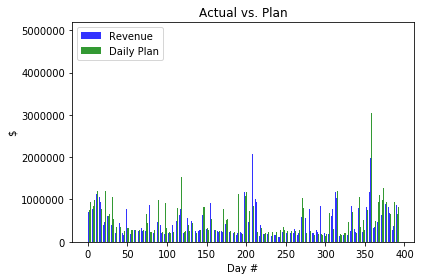

In [14]:
#Graph Revenue compared to Plan

# data to plot
n_days = len(all_df)
daily_revenue = all_df['Revenue']
daily_plan = all_df['Daily Revenue Demand Plan']
 
#create plot
fig, ax = plt.subplots()
index = np.arange(n_days)
bar_width = 0.35
opacity = 0.8
 
rects3 = plt.bar(index, daily_revenue, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Revenue')
 
rects4 = plt.bar(index + bar_width, daily_plan, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Daily Plan')
 
plt.xlabel('Day #')
plt.ylabel('$')
plt.title('Actual vs. Plan')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
#Explore how close their revenue typically is compared to plan

df['% to Goal'] = daily_revenue/daily_plan

#Create a new column with 1 if % to goal was less than 50% and 0 if not
df['% to Goal < 50%'] = np.where(df['% to Goal'] < 0.5, 1, 0)

#Create a new column with 1 if % to goal was between 50%(including 50%) and 75% and 0 if not
df['% to Goal btwn 50% & 75%'] = np.where(np.logical_and(df['% to Goal'] >= 0.50, df['% to Goal'] < 0.75), 1, 0)

#Create a new column with 1 if % to goal was between 75%(including 75%) and 100% and 0 if not
df['% to Goal btwn 75% & 100%'] = np.where(np.logical_and(df['% to Goal'] >= 0.75, df['% to Goal'] < 1), 1, 0)

#Create a new column with 1 if % to goal was between 100%(including 100%) and 125% and 0 if not
df['% to Goal btwn 100% & 125%'] = np.where(np.logical_and(df['% to Goal'] >= 1, df['% to Goal'] < 1.25), 1, 0)

#Create a new column with 1 if % to goal was greater than 125%(including 125%) and 0 if not
df['% to Goal >= 125%'] = np.where(df['% to Goal'] >= 1.25, 1, 0)

#Value Counts
lessthan50 = df['% to Goal < 50%'].value_counts()
btwn50_75 = df['% to Goal btwn 50% & 75%'].value_counts()
btwn75_100 = df['% to Goal btwn 75% & 100%'].value_counts()
btwn100_125 = df['% to Goal btwn 100% & 125%'].value_counts()
greaterthanorequalto125 = df['% to Goal >= 125%'].value_counts()

print('Number of Days Less Than 50% to Goal:',lessthan50[1], 'Percentage of Days:', "{:.2%}".format(lessthan50[1]/days))
print('Number of Days Between 50% and 75% to Goal:',btwn50_75[1], 'Percentage of Days:', "{:.2%}".format(btwn50_75[1]/days))
print('Number of Days Between 75% and 100% to Goal:',btwn75_100[1], 'Percentage of Days:', "{:.2%}".format(btwn75_100[1]/days))
print('Number of Days Between 100% and 125% to Goal:',btwn100_125[1], 'Percentage of Days:', "{:.2%}".format(btwn100_125[1]/days))
print('Number of Days Greater Than or Equal to 125% to Goal:',greaterthanorequalto125[1], 'Percentage of Days:', "{:.2%}".format(greaterthanorequalto125[1]/days))

Number of Days Less Than 50% to Goal: 19 Percentage of Days: 4.83%
Number of Days Between 50% and 75% to Goal: 101 Percentage of Days: 25.70%
Number of Days Between 75% and 100% to Goal: 147 Percentage of Days: 37.40%
Number of Days Between 100% and 125% to Goal: 72 Percentage of Days: 18.32%
Number of Days Greater Than or Equal to 125% to Goal: 54 Percentage of Days: 13.74%


In [16]:
#Understand trends in the data

#Create columns for portions of the date (year, month, day, year-month)
def getMonth(s):
  return s.split("-")[1]

def getYear(s):
  return s.split("-")[0]

def getDay(s):
  return s.split("-")[2]

def getYearMonth(s):
  return s.split("-")[0]+"-"+s.split("-")[1]

df['year']= df['Date'].apply(lambda x: getYear(x))
df['month']= df['Date'].apply(lambda x: getMonth(x))
df['day']= df['Date'].apply(lambda x: getDay(x))
df['YearMonth']= df['Date'].apply(lambda x: getYearMonth(x))

print(df.head())

#Create a new dataframe with just the sum of revenue by device by Month/Year
df1 = df.groupby(df['YearMonth']).sum().reset_index()
print(df1.info())

   Unnamed: 0        Date     Revenue     Users  Sessions  Transactions  \
0           0  2016-12-04  1221370.25  306549.0  379353.0        7667.0   
1           1  2016-12-05   704274.10  233431.0  281685.0        5025.0   
2           2  2016-12-06   619297.48  282736.0  345140.0        4597.0   
3           3  2016-12-07   636135.35  259674.0  321574.0        5004.0   
4           4  2016-12-08   777424.30  324932.0  404220.0        6542.0   

   Quantity   Bounces  Pages / Session Session Duration    ...      % to Goal  \
0   10094.0  119198.0             4.36      22102:57:44    ...       0.667415   
1    7252.0   95546.0             4.24      16100:14:14    ...       0.863514   
2    6169.0  139158.0             3.72      17118:51:58    ...       0.831559   
3    6776.0  121949.0             4.01      17390:56:33    ...       0.679271   
4    9046.0  173149.0             3.82      20827:29:21    ...       0.696673   

   % to Goal < 50%  % to Goal btwn 50% & 75%  % to Goal btwn 7

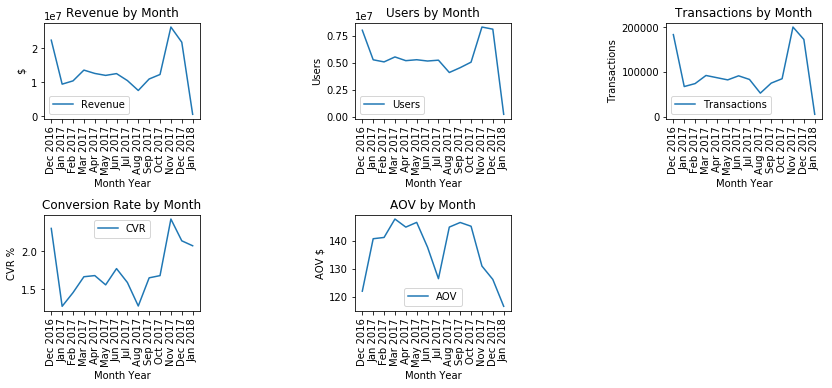

In [17]:
#Graph KPIs by Month/Year
n_groups_df1 = len(df1)
index_df1 = np.arange(n_groups_df1)
labels = ('Dec 2016', 'Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017', 'Jan 2018')
revenue = df1['Revenue']
users = df1['Users']
transactions = df1['Transactions']
cvr = transactions/users * 100
aov = revenue/transactions

_ = plt.subplot(2, 3, 1)
_ = plt.plot(index_df1, revenue, label= 'Revenue')
plt.xlabel('Month Year')
plt.ylabel('$')
plt.title('Revenue by Month')
plt.xticks(index_df1, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 3, 2)
_ = plt.plot(index_df1, users, label = 'Users')
plt.xlabel('Month Year')
plt.ylabel('Users')
plt.title('Users by Month')
plt.xticks(index_df1, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 3, 3)
_ = plt.plot(index_df1, transactions, label = 'Transactions')
plt.xlabel('Month Year')
plt.ylabel('Transactions')
plt.title('Transactions by Month')
plt.xticks(index_df1, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 3, 4)
_ = plt.plot(index_df1, cvr, label = 'CVR')
plt.xlabel('Month Year')
plt.ylabel('CVR %')
plt.title('Conversion Rate by Month')
plt.xticks(index_df1, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 3, 5)
_ = plt.plot(index_df1, aov, label = 'AOV')
plt.xlabel('Month Year')
plt.ylabel('AOV $')
plt.title('AOV by Month')
plt.xticks(index_df1, labels, rotation=90)
plt.legend()


plt.subplots_adjust(top=3.0, bottom=2.0, left=0.20, right=2.0, hspace=1.0, wspace=1.0)
plt.show()

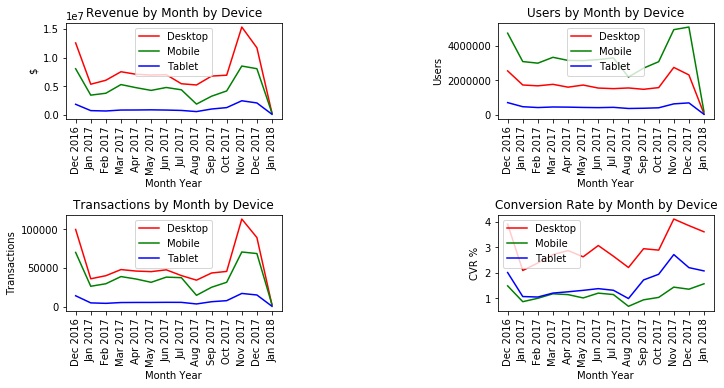

In [18]:
n_groups = len(df1)
index = np.arange(n_groups)
d_label = 'Desktop'
m_label = 'Mobile'
t_label = 'Tablet'
d_color = 'r'
m_color = 'g'
t_color = 'b'

revenue_desktop = df1["('Revenue', 'desktop')"]
revenue_mobile = df1["('Revenue', 'mobile')"]
revenue_tablet = df1["('Revenue', 'tablet')"]

users_desktop = df1["('Users', 'desktop')"]
users_mobile = df1["('Users', 'mobile')"]
users_tablet = df1["('Users', 'tablet')"]

trans_desktop = df1["('Transactions', 'desktop')"]
trans_mobile = df1["('Transactions', 'mobile')"]
trans_tablet = df1["('Transactions', 'tablet')"]

cvr_desktop = trans_desktop/users_desktop * 100
cvr_mobile = trans_mobile/users_mobile * 100
cvr_tablet = trans_tablet/users_tablet * 100

_ = plt.subplot(2, 2, 1)
_ = plt.plot(index, revenue_desktop, color= d_color, label= d_label)
_ = plt.plot(index, revenue_mobile, color= m_color, label= m_label)
_ = plt.plot(index, revenue_tablet, color= t_color, label= t_label)
plt.xlabel('Month Year')
plt.ylabel('$')
plt.title('Revenue by Month by Device')
plt.xticks(index, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 2, 2)
_ = plt.plot(index, users_desktop, color= d_color, label= d_label)
_ = plt.plot(index, users_mobile, color= m_color, label= m_label)
_ = plt.plot(index, users_tablet, color= t_color, label= t_label)
plt.xlabel('Month Year')
plt.ylabel('Users')
plt.title('Users by Month by Device')
plt.xticks(index, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 2, 3)
_ = plt.plot(index, trans_desktop, color= d_color, label= d_label)
_ = plt.plot(index, trans_mobile, color= m_color, label= m_label)
_ = plt.plot(index, trans_tablet, color= t_color, label= t_label)
plt.xlabel('Month Year')
plt.ylabel('Transactions')
plt.title('Transactions by Month by Device')
plt.xticks(index, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 2, 4)
_ = plt.plot(index, cvr_desktop, color= d_color, label= d_label)
_ = plt.plot(index, cvr_mobile, color= m_color, label= m_label)
_ = plt.plot(index, cvr_tablet, color= t_color, label= t_label)
plt.xlabel('Month Year')
plt.ylabel('CVR %')
plt.title('Conversion Rate by Month by Device')
plt.xticks(index, labels, rotation=90)
plt.legend()

plt.subplots_adjust(top=3.0, bottom=2.0, left=0.50, right=2.0, hspace=1.0, wspace=1.0)
plt.show()

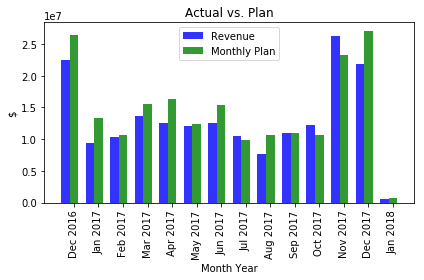

In [19]:
#Create a new dataframe with just the sum of revenue and sum of plan by Month/Year
df2 = df.groupby(df['YearMonth'])['Revenue','Daily Revenue Demand Plan'].sum()

#Side by side bar chart to compare revenue to plan

# data to plot
n_groups = len(df2)
revenue = df2['Revenue']
monthly_plan = df2['Daily Revenue Demand Plan']
 
#create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, revenue, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Revenue')
 
rects2 = plt.bar(index + bar_width, monthly_plan, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Monthly Plan')
 
plt.xlabel('Month Year')
plt.ylabel('$')
plt.title('Actual vs. Plan')
plt.xticks(index + bar_width, labels, rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

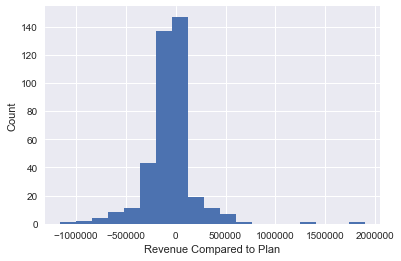

In [20]:
#Histogram to understand the difference between actual revenue and planned revenue
df['Rev Compared to Plan'] = df['Revenue'] - df['Daily Revenue Demand Plan']

n_data = len(df['Revenue'])
n_bins = int(np.sqrt(n_data))

#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(df['Rev Compared to Plan'], bins= n_bins)
_ = plt.xlabel('Revenue Compared to Plan')
_ = plt.ylabel('Count')

plt.show()

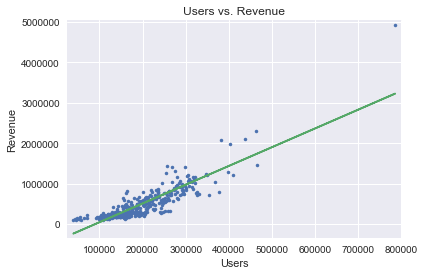

In [21]:
#Create a scatterplot to look at the correlation between unique web traffic and revenue
m, b = np.polyfit(df['Users'], df['Revenue'], 1)

_ = plt.plot(df['Users'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Users'], m*df['Users'] + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Users')
_ = plt.ylabel('Revenue')
_ = plt.title('Users vs. Revenue')

plt.show()

In [22]:
#Update the date formate to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#Drop Cyber Monday since it's an outlier
df = df.drop(df.index[358]).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Columns: 113 entries, Unnamed: 0 to Rev Compared to Plan
dtypes: datetime64[ns](1), float64(85), int32(5), int64(17), object(5)
memory usage: 338.5+ KB


In [23]:
#Calculate the emperical means and standard deviations for Revenue, Revenue Plan, Difference, Sessions

rev_mean = np.mean(df['Revenue'])
rev_std = np.std(df['Revenue'])
rev_plan_mean = np.mean(df['Daily Revenue Demand Plan'])
rev_plan_std = np.std(df['Daily Revenue Demand Plan'])
df['Rev Compared to Plan'] = df['Revenue'] - df['Daily Revenue Demand Plan']
rev_to_plan_mean = np.mean(df['Rev Compared to Plan'])
rev_to_plan_std = np.std(df['Rev Compared to Plan'])
users_mean = np.mean(df['Users'])
users_std = np.std(df['Users'])

print('Mean Daily Revenue:',  "${0:,.2f}".format(rev_mean), 'Standard Deviation Daily Revenue:', "${0:,.2f}".format(rev_std))
print('Mean Daily Revenue Plan:',  "${0:,.2f}".format(rev_plan_mean), 'Standard Deviation Daily Revenue Plan:',  "${0:,.2f}".format(rev_plan_std))
print('Mean Revenue Compared to Plan:',  "${0:,.2f}".format(rev_to_plan_mean), 'Standard Deviation Revenue Compared to Plan:',  "${0:,.2f}".format(rev_to_plan_std))
print('Mean Users:',  "{0:,.0f}".format(users_mean), 'Standard Deviation Users:',  "{0:,.0f}".format(users_std))

Mean Daily Revenue: $454,690.30 Standard Deviation Daily Revenue: $343,490.39
Mean Daily Revenue Plan: $510,247.99 Standard Deviation Daily Revenue Plan: $374,197.71
Mean Revenue Compared to Plan: $-55,557.69 Standard Deviation Revenue Compared to Plan: $228,005.99
Mean Users: 189,499 Standard Deviation Users: 72,051


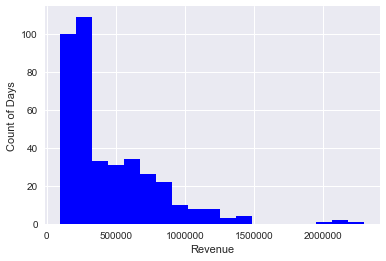

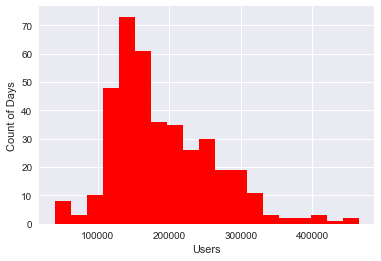

In [24]:
#Create histograms for Sessions & Revenue

#Calculate the bin number
n_data = len(df['Revenue'])
n_bins = int(np.sqrt(n_data))

#Create a histogram to visualize Revenue

_ = plt.hist(df['Revenue'], bins=n_bins, color='b')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count of Days')

plt.show()

#Create a histogram to visualize Users

_ = plt.hist(df['Users'], bins= n_bins, color='r')
_ = plt.xlabel('Users')
_ = plt.ylabel('Count of Days')

plt.show()

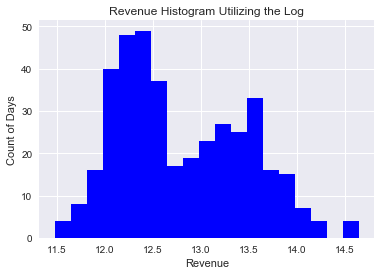

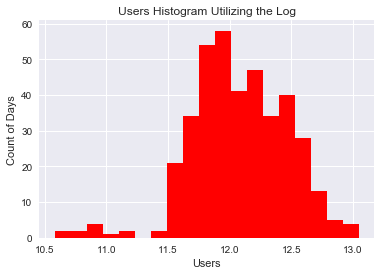

In [25]:
#Create a histogram to visualize Revenue using the log
_ = plt.hist(np.log(df['Revenue']), bins=n_bins, color='b')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count of Days')
_ = plt.title('Revenue Histogram Utilizing the Log')
plt.show()

#Create a histogram to visualize Users using the log
_ = plt.hist(np.log(df['Users']), bins= n_bins, color='r')
_ = plt.xlabel('Users')
_ = plt.ylabel('Count of Days')
_ = plt.title('Users Histogram Utilizing the Log')

plt.show()

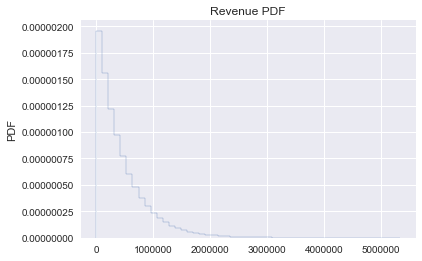

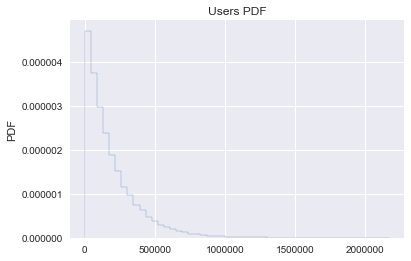

In [26]:
np.random.seed(42)

tau = np.mean(df['Revenue'])
#Draw out of an exponential distribution with parameter tau: Revenue

inter_revenue = np.random.exponential(tau, 100000)

_ = plt.hist(inter_revenue, bins = 50, normed=True, histtype = 'step')
_ = plt.ylabel('PDF')
_ = plt.title('Revenue PDF')
plt.show()

tau2 = np.mean(df['Users'])
#Draw out of an exponential distribution with parameter tau: Revenue

inter_users = np.random.exponential(tau2, 100000)

_ = plt.hist(inter_users, bins = 50, normed=True, histtype = 'step')
_ = plt.ylabel('PDF')
_ = plt.title('Users PDF')
plt.show()

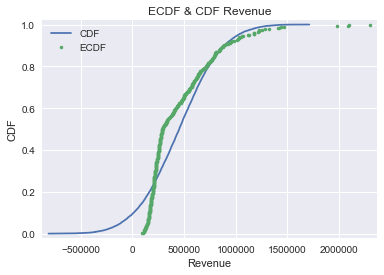

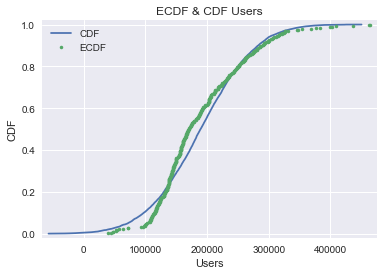

In [27]:
#Compute the ECDF for Revenue Data:

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1.0, n+1.0) / n
    return x, y

#Create the samples
samples = np.random.normal(rev_mean, rev_std, size=10000)
users_samples = np.random.normal(users_mean, users_std, size=10000)

#Calculate the ECDF of the data and the samples
x_rev, y_rev = ecdf(df['Revenue'])
x_theor, y_theor = ecdf(samples)

#Graph the ECDF of the data and the samples
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_rev, y_rev, marker ='.', linestyle= 'none')
_ = plt.margins(0.02)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('CDF')
_ = plt.title('ECDF & CDF Revenue')
_ = plt.legend(('CDF', 'ECDF'), loc='upper left')
plt.show()

#Calculate the ECDF of the data and the samples
x_users, y_users = ecdf(df['Users'])
x_utheor, y_utheor = ecdf(users_samples)

#Graph the ECDF of the data and the samples
_ = plt.plot(x_utheor, y_utheor)
_ = plt.plot(x_users, y_users, marker ='.', linestyle= 'none')
_ = plt.margins(0.02)
_ = plt.xlabel('Users')
_ = plt.ylabel('CDF')
_ = plt.title('ECDF & CDF Users')
_ = plt.legend(('CDF', 'ECDF'), loc='upper left')
plt.show()

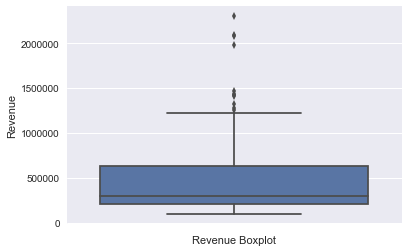

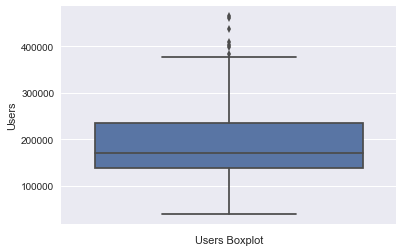

In [28]:
#Create boxplots for revenue and Users
_ = sns.boxplot(y='Revenue', data=df)
_ = plt.xlabel('Revenue Boxplot')
plt.show()

_ = sns.boxplot(y='Users', data=df)
_ = plt.xlabel('Users Boxplot')
plt.show()

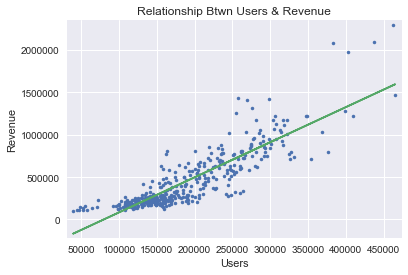

In [29]:
#Create new scatterplot to look at the correlation between Users and Revenue (now that the outlier was removed)

m, b = np.polyfit(df['Users'], df['Revenue'], 1)

_ = plt.plot(df['Users'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Users'], m*df['Users'] + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Users')
_ = plt.ylabel('Revenue')
_ = plt.title('Relationship Btwn Users & Revenue')

plt.show()

In [30]:
#Compute the covariance of Revenue and Users

covariance_matrix = np.cov(df['Revenue'], df['Users'])
print ('Covariance Matrix: ', covariance_matrix)

cov = covariance_matrix[0,1]
print ('Covariance: ', "{0:,.2f}".format(cov))

#Compute pearson correlation coefficient
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

r = pearson_r(df['Revenue'], df['Users'])

print ('Pearson R for Revenue and Users:', "{0:.4f}".format(r))

#Calculate the Slope and Intercept

slope, intercept = np.polyfit(df['Revenue'], df['Users'], 1)

print ('Slope:', "{0:.4f}".format(slope))
print ('Intercept:', "{0:,.4f}".format(intercept))

Covariance Matrix:  [[  1.18287404e+11   2.15626260e+10]
 [  2.15626260e+10   5.20460447e+09]]
Covariance:  21,562,625,976.13
Pearson R for Revenue and Users: 0.8690
Slope: 0.1823
Intercept: 106,613.0138


SEM Revenue: $17,348.88
STD Bootstrap Replicates Revenue: $17,537.11


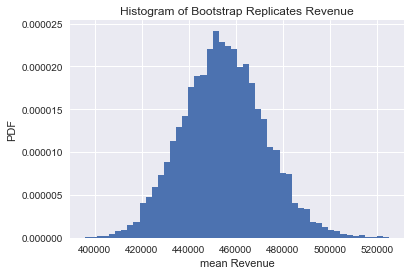

SEM Users: 3,639
STD Bootstrap Replicates Users: 3,688


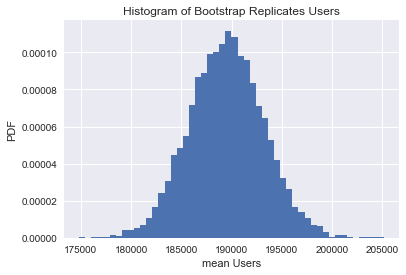

Confidence Intervals Revenue:  [ 421469.10921301  490477.76187819]
Confidence Intervals Users:  [ 182361.08373724  196752.44260204]


In [31]:
#Use Bootstrap replicates
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df['Revenue'], np.mean, 10000)

# Compute and print SEM
sem = np.std(df['Revenue'])/ np.sqrt(len(df['Revenue']))
print ('SEM Revenue:', "${0:,.2f}".format(sem))

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print ('STD Bootstrap Replicates Revenue:', "${0:,.2f}".format(bs_std))

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean Revenue')
_ = plt.ylabel('PDF')
_ = plt.title('Histogram of Bootstrap Replicates Revenue')

# Show the plot
plt.show()

conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates_users = draw_bs_reps(df['Users'], np.mean, 10000)

# Compute and print SEM
sem_users = np.std(df['Users'])/ np.sqrt(len(df['Users']))
print ('SEM Users:', "{0:,.0f}".format(sem_users))

# Compute and print standard deviation of bootstrap replicates
bs_std_users = np.std(bs_replicates_users)
print ('STD Bootstrap Replicates Users:', "{0:,.0f}".format(bs_std_users))

# Make a histogram of the results
_ = plt.hist(bs_replicates_users, bins=50, normed=True)
_ = plt.xlabel('mean Users') 
_ = plt.ylabel('PDF')
_ = plt.title('Histogram of Bootstrap Replicates Users')

# Show the plot
plt.show()

conf_int_users = np.percentile(bs_replicates_users, [2.5, 97.5])

print ('Confidence Intervals Revenue: ', conf_int)
print ('Confidence Intervals Users: ', conf_int_users)

95% Confidence Intervals: [ 3.7646641   4.52680124]


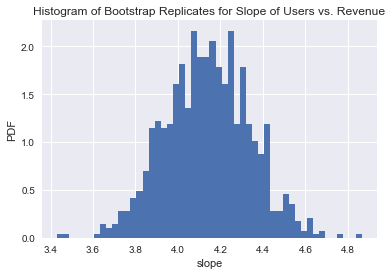

In [32]:
#Pairs Bootstrap

def draw_bs_pairs_linreg(x, y, size=1):

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


# Generate replicates of slope and intercept using pairs bootstrap
x_users = df['Users']
y_revenue = df['Revenue']
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x_users, y_revenue, 1000)

# Compute and print 95% CI for slope
print ('95% Confidence Intervals:',(np.percentile(bs_slope_reps, [2.5, 97.5])))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
_ = plt.title('Histogram of Bootstrap Replicates for Slope of Users vs. Revenue')
plt.show()


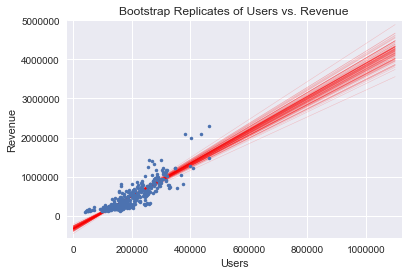

In [33]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,1100000])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(df['Users'], df['Revenue'], marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('Users')
_ = plt.ylabel('Revenue')
_ = plt.title('Bootstrap Replicates of Users vs. Revenue')
plt.margins(0.02)
plt.show()

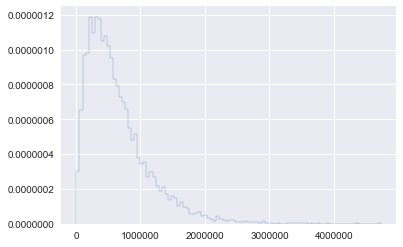

In [34]:
def successive_poisson(tau1, tau2, size=1):
    t1 = np.random.exponential(tau1, size)
    t2 = np.random.exponential(tau2, size)
    return t1 + t2

sample_successive_poisson = successive_poisson(rev_mean, users_mean, 10000)

_ = plt.hist(sample_successive_poisson, bins=100, normed = True, histtype='step')
plt.show()

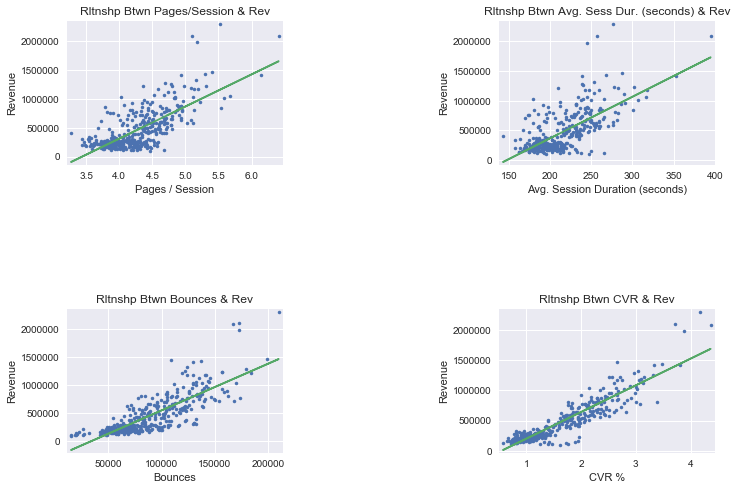

In [35]:
#Exploring the relationship between other features and revenue.

#Create a scatterplot to look at the correlation between pages/session and revenue
m, b = np.polyfit(df['Pages / Session'], df['Revenue'], 1)

_ = plt.subplot(2, 2, 1)
_ = plt.plot(df['Pages / Session'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Pages / Session'], m*df['Pages / Session'] + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Pages / Session')
_ = plt.ylabel('Revenue')
_ = plt.title('Rltnshp Btwn Pages/Session & Rev')

#Create a scatterplot to look at the correlation between Avg. Session Duration (in seconds) and Revenue

m1, b1 = np.polyfit(df['Avg. Session Duration Seconds'], df['Revenue'], 1)

_ = plt.subplot(2, 2, 2)
_ = plt.plot(df['Avg. Session Duration Seconds'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Avg. Session Duration Seconds'], m1 * df['Avg. Session Duration Seconds'] + b1, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Avg. Session Duration (seconds)')
_ = plt.ylabel('Revenue')
_ = plt.title('Rltnshp Btwn Avg. Sess Dur. (seconds) & Rev')


#Create a scatterplot to look at the correlation between Bounces and revenue


m2, b2 = np.polyfit(df['Bounces'], df['Revenue'], 1)

_ = plt.subplot(2, 2, 3)
_ = plt.plot(df['Bounces'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Bounces'], m2 * df['Bounces'] + b2, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Bounces')
_ = plt.ylabel('Revenue')
_ = plt.title('Rltnshp Btwn Bounces & Rev')


#Create a scatterplot to look at the correlation between Conversion Rate and Revenue

cvr = df['Transactions']/df['Users'] * 100

m3, b3 = np.polyfit(cvr, df['Revenue'], 1)

_ = plt.subplot(2, 2, 4)
_ = plt.plot(cvr, df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(cvr, m3 * cvr + b3, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('CVR %')
_ = plt.ylabel('Revenue')
_ = plt.title('Rltnshp Btwn CVR & Rev')

plt.subplots_adjust(top=3.5, bottom=2.0, left=0.50, right=2.0, hspace=1.0, wspace=1.0)
plt.show()

In [36]:
#Compute pearson correlation coefficient

r = pearson_r(df['Revenue'], df['Pages / Session'])

print ('Pearson R for Revenue and Pages / Session:', "{0:.4f}".format(r))

r1 = pearson_r(df['Revenue'], df['Bounces'])

print ('Pearson R for Revenue and Bounces:',"{0:.4f}".format(r1))

r2 = pearson_r(df['Revenue'], cvr)

print ('Pearson R for Revenue and Conversion Rate:', "{0:.4f}".format(r2))

r3 = pearson_r(df['Revenue'], df['Avg. Session Duration Seconds'])

print ('Pearson R for Revenue and Avg. Session Duration (seconds):', "{0:.4f}".format(r3))

Pearson R for Revenue and Pages / Session: 0.7183
Pearson R for Revenue and Bounces: 0.8079
Pearson R for Revenue and Conversion Rate: 0.9170
Pearson R for Revenue and Avg. Session Duration (seconds): 0.6739


In [37]:
#Separate the data for email days and non email days

email_days = df[df['Email Day'] == 1]
non_email_days = df[df['Email Day'] == 0]

#Separate the data for SS days and non SS days

ss_days = df[df['SS'] == 1]
non_ss_days = df[df['SS'] == 0]

#Separate the data for SOS days and non SOS days

sos_days = df[df['SOS'] == 1]
non_sos_days = df[df['SOS'] == 0]

#Calculate the mean and standard deviations for Revenue for the two new email datasets.
email_mean = np.mean(email_days['Revenue'])
email_std = np.std(email_days['Revenue'])
non_email_mean = np.mean(non_email_days['Revenue'])
non_email_std = np.std(non_email_days['Revenue'])
print ('Email Data: \n')
print ('Mean Revenue Email Days:', "${0:,.2f}".format(email_mean))
print ('Standard Deviation Email Days:',  "${0:,.2f}".format(email_std))
print ('Mean Revenue Non Email Days:',  "${0:,.2f}".format(non_email_mean))
print ('Standard Deviation Non Email Days:',  "${0:,.2f}".format(non_email_std))

#Import library necessary for t-test and z-score

from scipy import stats

#Calculate the t statistic and p-value for the two sample t-test.

two_sample = stats.ttest_ind(email_days['Revenue'], non_email_days['Revenue'])

print ('Email vs. Non Email Days TTest:',  "{0:.6f}".format(two_sample[0]))
print ('Email vs. Non Email Days PValue:',  "{0:.6f}".format(two_sample[1]))

#Calculate the mean and standard deviations for Revenue for the two new SS datasets.
ss_mean = np.mean(ss_days['Revenue'])
ss_std = np.std(ss_days['Revenue'])
non_ss_mean = np.mean(non_ss_days['Revenue'])
non_ss_std = np.std(non_ss_days['Revenue'])
print ('\nSS Data: \n')
print ('Mean Revenue SS Days:',  "${0:,.2f}".format(ss_mean))
print ('Standard Deviation SS Days:',  "${0:,.2f}".format(ss_std))
print ('Mean Revenue Non SS Days:',  "${0:,.2f}".format(non_ss_mean))
print ('Standard Deviation Non SS Days:',  "${0:,.2f}".format(non_ss_std))

#Calculate the t statistic and p-value for the two sample t-test.

two_sample1 = stats.ttest_ind(ss_days['Revenue'], non_ss_days['Revenue'])

print ('SS vs. Non SS Days TTest:',  "{0:.6f}".format(two_sample1[0]))
print ('SS vs. Non SS Days PValue:',  "{0:.6f}".format(two_sample1[1]))

#Calculate the mean and standard deviations for Revenue for the two new SOS datasets.
sos_mean = np.mean(sos_days['Revenue'])
sos_std = np.std(sos_days['Revenue'])
non_sos_mean = np.mean(non_sos_days['Revenue'])
non_sos_std = np.std(non_sos_days['Revenue'])
print ('\nSOS Data: \n')
print ('Mean Revenue SOS Days:',  "${0:,.2f}".format(sos_mean))
print ('Standard Deviation SOS Days:',  "${0:,.2f}".format(sos_std))
print ('Mean Revenue Non SOS Days:',  "${0:,.2f}".format(non_sos_mean))
print ('Standard Deviation Non SOS Days:',  "${0:,.2f}".format(non_sos_std))

#Calculate the t statistic and p-value for the two sample t-test.

two_sample2 = stats.ttest_ind(sos_days['Revenue'], non_sos_days['Revenue'])

print ('SOS vs. Non SOS Days TTest:',  "{0:.6f}".format(two_sample2[0]))
print ('SOS vs. Non SOS Days PValue:', "{0:.6f}".format(two_sample2[1]))

Email Data: 

Mean Revenue Email Days: $464,926.70
Standard Deviation Email Days: $354,854.02
Mean Revenue Non Email Days: $435,203.22
Standard Deviation Non Email Days: $319,842.39
Email vs. Non Email Days TTest: 0.812704
Email vs. Non Email Days PValue: 0.416884

SS Data: 

Mean Revenue SS Days: $531,314.11
Standard Deviation SS Days: $471,450.88
Mean Revenue Non SS Days: $447,413.18
Standard Deviation Non SS Days: $327,828.28
SS vs. Non SS Days TTest: 1.360843
SS vs. Non SS Days PValue: 0.174349

SOS Data: 

Mean Revenue SOS Days: $636,702.05
Standard Deviation SOS Days: $298,618.22
Mean Revenue Non SOS Days: $387,231.40
Standard Deviation Non SOS Days: $334,418.17
SOS vs. Non SOS Days TTest: 6.730527
SOS vs. Non SOS Days PValue: 0.000000


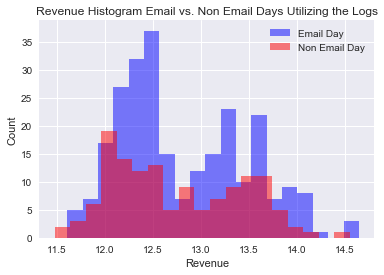

In [38]:
#Create a histogram showing both datasets.
sns.set()

_ = plt.hist(np.log(email_days['Revenue']), bins= n_bins, alpha=0.5, color='b', label = 'Email Day')
_ = plt.hist(np.log(non_email_days['Revenue']), bins= n_bins, alpha=0.5, color='r', label = 'Non Email Day')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.title('Revenue Histogram Email vs. Non Email Days Utilizing the Logs')
plt.legend()
plt.show()

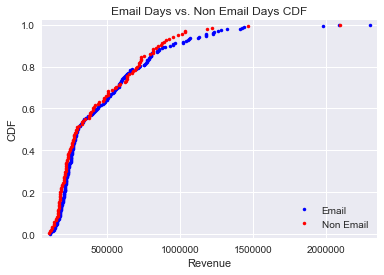

In [39]:
#Calculate the ECDF of the data for email and non email days
x_email, y_email = ecdf(email_days['Revenue'])
x_nonemail, y_nonemail = ecdf(non_email_days['Revenue'])

#Create an ECDF graph for the two datasets
_ = plt.plot(x_email, y_email, marker ='.', linestyle= 'none', color='b')
_ = plt.plot(x_nonemail, y_nonemail, marker ='.', linestyle= 'none', color='r')
_ = plt.margins(0.02)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('CDF')
_ = plt.legend(('Email', 'Non Email'), loc='lower right')
_ = plt.title('Email Days vs. Non Email Days CDF')
plt.show()

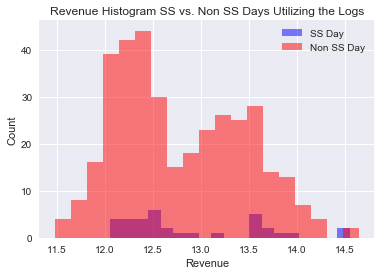

In [40]:
#Create a histogram showing both datasets.
sns.set()

_ = plt.hist(np.log(ss_days['Revenue']), bins= n_bins, alpha=0.5, color='b', label = 'SS Day')
_ = plt.hist(np.log(non_ss_days['Revenue']), bins= n_bins, alpha=0.5, color='r', label = 'Non SS Day')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.title('Revenue Histogram SS vs. Non SS Days Utilizing the Logs')
plt.legend()
plt.show()

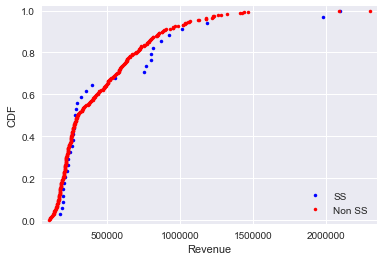

In [41]:
#Calculate the ECDF of the data for ss and non ss days
x_ss, y_ss = ecdf(ss_days['Revenue'])
x_nonss, y_nonss = ecdf(non_ss_days['Revenue'])

#Create an ECDF graph for the two datasets
_ = plt.plot(x_ss, y_ss, marker ='.', linestyle= 'none', color='b')
_ = plt.plot(x_nonss, y_nonss, marker ='.', linestyle= 'none', color='r')
_ = plt.margins(0.02)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('CDF')
_ = plt.legend(('SS', 'Non SS'), loc='lower right')
plt.show()

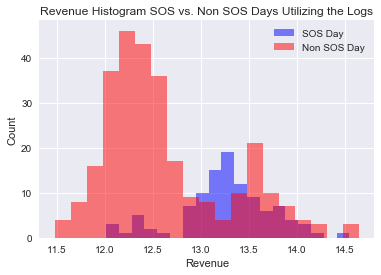

In [42]:
#Create a histogram showing both datasets.
sns.set()

_ = plt.hist(np.log(sos_days['Revenue']), bins= n_bins, alpha=0.5, color='b', label = 'SOS Day')
_ = plt.hist(np.log(non_sos_days['Revenue']), bins= n_bins, alpha=0.5, color='r', label = 'Non SOS Day')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.title('Revenue Histogram SOS vs. Non SOS Days Utilizing the Logs')
plt.legend()
plt.show()

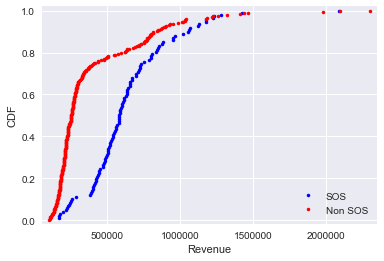

In [43]:
#Calculate the ECDF of the data for sos and non sos days
x_sos, y_sos = ecdf(sos_days['Revenue'])
x_nonsos, y_nonsos = ecdf(non_sos_days['Revenue'])

#Create an ECDF graph for the two datasets
_ = plt.plot(x_sos, y_sos, marker ='.', linestyle= 'none', color='b')
_ = plt.plot(x_nonsos, y_nonsos, marker ='.', linestyle= 'none', color='r')
_ = plt.margins(0.02)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('CDF')
_ = plt.legend(('SOS', 'Non SOS'), loc='lower right')
plt.show()

# Model Selection

## Data Preparation for Machine Learning Models

In [44]:
#Import file
model_df = pd.read_csv('project1_all_df.csv')
model_df['Date'] = pd.to_datetime(model_df['Date'], format='%Y-%m-%d')

#Drop columns that we don't want to use in prediction
model_df = model_df.drop(['Unnamed: 0', 'Date', 'Revenue', 'Users', 'Sessions', 'Transactions', 'Quantity', 'Bounces', 'Pages / Session',
              'Session Duration', 'Avg. Session Duration Seconds', "('Users', '(Other)')", "('Users', 'Affiliate')","('Users', 'CSE')",
             "('Users', 'Direct')", "('Users', 'Display')", "('Users', 'Email')","('Users', 'Organic Search')", 
             "('Users', 'Organic Social')", "('Users', 'Paid Search')", "('Users', 'Paid Social')", "('Users', 'Partnerships')",
             "('Users', 'Referral')","('Users', 'Social')", "('Revenue', '(Other)')", "('Revenue', 'Affiliate')",
             "('Revenue', 'CSE')", "('Revenue', 'Direct')", "('Revenue', 'Display')", "('Revenue', 'Email')",
             "('Revenue', 'Organic Search')", "('Revenue', 'Organic Social')", "('Revenue', 'Paid Search')",
             "('Revenue', 'Paid Social')", "('Revenue', 'Partnerships')", "('Revenue', 'Referral')","('Revenue', 'Social')",
             "('Transactions', '(Other)')", "('Transactions', 'Affiliate')","('Transactions', 'CSE')", "('Transactions', 'Direct')",
             "('Transactions', 'Display')", "('Transactions', 'Email')","('Transactions', 'Organic Search')",
             "('Transactions', 'Organic Social')", "('Transactions', 'Paid Search')", "('Transactions', 'Paid Social')", 
             "('Transactions', 'Partnerships')", "('Transactions', 'Referral')","('Transactions', 'Social')","('Users', 'desktop')", 
             "('Users', 'mobile')","('Users', 'tablet')", "('Revenue', 'desktop')", "('Revenue', 'mobile')","('Revenue', 'tablet')",
              "('Transactions', 'desktop')", "('Transactions', 'mobile')","('Transactions', 'tablet')", "('Spend', 'Affiliate')",
              "('Spend', 'CSE')","('Spend', 'Display')", "('Spend', 'PLA')", "('Spend', 'Paid Search')", "('Spend', 'Paid Social')",
              "Orders Plan", "Units Plan", "Daily Margin $ Plan", "Daily Net Shipped Revenue Plan", 'Daily Traffic Plan', 'CVR Plan', 
              'AOV Plan', 'SS', 'MD', 'GWP', 'FF', 'DOTD', 'SOS', 'SWP', 'EA'], axis=1)

#Replace infinity values with NaN
model_df = model_df.replace([np.inf], np.nan)
model_df = model_df.fillna(0)

#Replace negative numbers with 0 (there are instances of negative spend)
model_df = model_df.clip(lower=0)

print(model_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 22 columns):
Users Yesterday                  393 non-null float64
Avg. Users last 7 days           393 non-null float64
Bounce Rate Yesterday            393 non-null float64
Pages/Sess Yesterday             393 non-null float64
Avg. Sess Dur Sec Yesterday      393 non-null float64
Users LY                         393 non-null float64
Bounce Rate LY                   393 non-null float64
Pages / Sess LY                  393 non-null float64
Avg. Sess LY                     393 non-null float64
Daily Revenue Demand Plan        393 non-null float64
Email Day                        393 non-null float64
NA                               393 non-null float64
Sale Day                         393 non-null float64
('Spend Yesterday', '')          393 non-null float64
('Spend LY', '')                 393 non-null float64
Rev Goal Reached                 393 non-null float64
Rev Goal Reached Yesterday     

In [45]:
#Create the column to be predicted
y = model_df['Rev Goal Reached'].values
X = model_df.drop('Rev Goal Reached', axis = 1).values

#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify=y)

## K-Nearest Neighbors Classifer (KNN)

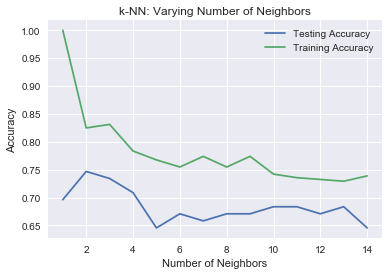

In [46]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [47]:
#knn method with number of neighbors = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cv_scores_knn = cross_val_score(knn, X, y, cv=5, scoring ='roc_auc')

print("KNN Test Set Predictions:\n {}".format(y_pred_knn))

print("\nKNN Accuracy Score Train:", "{:.4f}".format(knn.score(X_train, y_train)))
print("\nKNN Accuracy Score Test:", "{:.4f}".format(knn.score(X_test, y_test)))

#Confusion Matrix
print('\nKNN Confusion Matrix:\n', confusion_matrix(y_test, y_pred_knn))

#Classification Report
print('\nKNN Classification Report:\n', classification_report(y_test, y_pred_knn))

#Cross Validation Scores
print ("\nKNN Classifcation AUC scores computed using 5-fold cross-validation:\n",(cv_scores_knn))

#GridSearch
param_grid = {'n_neighbors':np.arange(1, 50)}

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)

print ("\nTuned KNN Parameters: {}".format(knn_cv.best_params_))
print ("\nBest score is {}".format(knn_cv.best_score_))

KNN Test Set Predictions:
 [ 0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  1.
  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  0.  0.  1.  0.  0.]

KNN Accuracy Score Train: 0.8312

KNN Accuracy Score Test: 0.7342

KNN Confusion Matrix:
 [[46  8]
 [13 12]]

KNN Classification Report:
              precision    recall  f1-score   support

        0.0       0.78      0.85      0.81        54
        1.0       0.60      0.48      0.53        25

avg / total       0.72      0.73      0.73        79


KNN Classifcation AUC scores computed using 5-fold cross-validation:
 [ 0.61680912  0.52592593  0.68867925  0.70679245  0.50716981]

Tuned KNN Parameters: {'n_neighbors': 24}

Best score is 0.6972010178117048


## Multinomial Naive Bayes (MNB)

In [48]:
#clf
clf = MultinomialNB()
clf.fit(X_train, y_train)
#MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)
y_pred_MNB = clf.predict(X_test)
cv_scores_MNB = cross_val_score(clf, X, y, cv=5, scoring ='roc_auc')

print("Multinomial NB Test Set Predictions:\n {}".format(y_pred_MNB))
print('\nMultinomial NB Accuracy Score Training Set:', "{:.4f}".format(acc_train))
print('\nMultinomial NB Accuracy Score Test Set:', "{:.4f}".format(acc_test))

#Confusion Matrix
print('\nMultinomial NB Confusion Matrix:\n', confusion_matrix(y_test, y_pred_MNB))

#Classification Report
print('\nMultinomial NB Classification Report:\n', classification_report(y_test, y_pred_MNB))
      
#Cross Validation Scores
print("\nMultinomial NB Classifcation AUC scores computed using 5-fold cross-validation:\n",(cv_scores_MNB))

Multinomial NB Test Set Predictions:
 [ 0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  1.  0.
  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.
  1.  1.  0.  0.  1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.
  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  1.  0.
  0.  0.  1.  1.  1.  1.  0.]

Multinomial NB Accuracy Score Training Set: 0.5350

Multinomial NB Accuracy Score Test Set: 0.5190

Multinomial NB Confusion Matrix:
 [[22 32]
 [ 6 19]]

Multinomial NB Classification Report:
              precision    recall  f1-score   support

        0.0       0.79      0.41      0.54        54
        1.0       0.37      0.76      0.50        25

avg / total       0.65      0.52      0.53        79


Multinomial NB Classifcation AUC scores computed using 5-fold cross-validation:
 [ 0.66239316  0.58555556  0.48792453  0.60528302  0.45698113]


## Logistic Regression

In [49]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring ='roc_auc')

print("Logistic Regression Test Set Predictions:\n {}".format(y_pred_logreg))

print("\nLogistic Regression Accuracy Score Train:", "{:.4f}".format(logreg.score(X_train, y_train)))
print("\nLogistic Regression Accuracy Score Test:", "{:.4f}".format(logreg.score(X_test, y_test)))

#Confusion Matrix
print('\nLogistic Regression Confusion Matrix:\n', confusion_matrix(y_test, y_pred_logreg))

#Classification Report
print('\nLogistic Regression Classification Report:\n',classification_report(y_test, y_pred_logreg))

#Cross Validation Scores
print ("\nLogistic Regression AUC scores computed using 5-fold cross-validation:\n",(cv_scores))

Logistic Regression Test Set Predictions:
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  1.  0.  0.  1.  0.  0.]

Logistic Regression Accuracy Score Train: 0.7166

Logistic Regression Accuracy Score Test: 0.6329

Logistic Regression Confusion Matrix:
 [[44 10]
 [19  6]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        0.0       0.70      0.81      0.75        54
        1.0       0.38      0.24      0.29        25

avg / total       0.60      0.63      0.61        79


Logistic Regression AUC scores computed using 5-fold cross-validation:
 [ 0.75356125  0.58740741  0.6845283   0.67924528  0.59698113]


## Gaussian Naive Bayes (GNB)

In [50]:
#GNB
clf_GNB = GaussianNB()
clf_GNB.fit(X_train, y_train)
y_pred_GNB = clf_GNB.predict(X_test)
cv_scores_GNB = cross_val_score(clf_GNB, X, y, cv=5, scoring ='roc_auc')

print("GNB Test Set Predictions:\n {}".format(y_pred_GNB))

print("\nGNB Accuracy Score Train:", "{:.4f}".format(clf_GNB.score(X_train, y_train)))
print("\nGNB Accuracy Score Test:", "{:.4f}".format(clf_GNB.score(X_test, y_test)))

#Confusion Matrix
print('\nGNB Confusion Matrix:\n', confusion_matrix(y_test, y_pred_GNB))

#Classification Report
print('\nGNB Classification Report:\n',classification_report(y_test, y_pred_GNB))

#Cross Validation Scores
print ("\nGNB AUC scores computed using 5-fold cross-validation:\n",(cv_scores_GNB))

GNB Test Set Predictions:
 [ 0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.
  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.]

GNB Accuracy Score Train: 0.6879

GNB Accuracy Score Test: 0.6835

GNB Confusion Matrix:
 [[47  7]
 [18  7]]

GNB Classification Report:
              precision    recall  f1-score   support

        0.0       0.72      0.87      0.79        54
        1.0       0.50      0.28      0.36        25

avg / total       0.65      0.68      0.65        79


GNB AUC scores computed using 5-fold cross-validation:
 [ 0.55769231  0.45851852  0.71924528  0.50037736  0.64      ]


## Decision Tree Classifier

In [51]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
cv_scores_tree = cross_val_score(tree, X, y, cv=5, scoring ='roc_auc')


# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

print("DTC Test Set Predictions:\n {}".format(y_pred_tree))

print("\nDTC Accuracy Score Train:", "{:.4f}".format(tree.score(X_train, y_train)))
print("\nDTC Accuracy Score Test:", "{:.4f}".format(tree.score(X_test, y_test)))

#Confusion Matrix
print('\nDTC Confusion Matrix:\n', confusion_matrix(y_test, y_pred_tree))

#Classification Report
print('\nDTC Classification Report:\n',classification_report(y_test, y_pred_tree))

#Cross Validation Scores
print ("\nDTC AUC scores computed using 5-fold cross-validation:\n",(cv_scores_tree))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 5}
Best score is 0.7455470737913485
DTC Test Set Predictions:
 [ 1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  1.  0.  1.
  0.  0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  1.  1.  1.]

DTC Accuracy Score Train: 1.0000

DTC Accuracy Score Test: 0.5696

DTC Confusion Matrix:
 [[33 21]
 [13 12]]

DTC Classification Report:
              precision    recall  f1-score   support

        0.0       0.72      0.61      0.66        54
        1.0       0.36      0.48      0.41        25

avg / total       0.61      0.57      0.58        79


DTC AUC scores computed using 5-fold cross-validation:
 [ 0.58048433  0.58259259  0.63396226  0.78679245  0.63622642]


## Linear Discriminant Analysis (LDA)

In [52]:
#LDA
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train, y_train)
y_pred_LDA = clf_LDA.predict(X_test)
cv_scores_LDA = cross_val_score(clf_LDA, X, y, cv=5, scoring ='roc_auc')

print("LDA Test Set Predictions:\n {}".format(y_pred_LDA))

print("\nLDA Accuracy Score Train:", "{:.4f}".format(clf_LDA.score(X_train, y_train)))
print("\nLDA Accuracy Score Test:", "{:.4f}".format(clf_LDA.score(X_test, y_test)))

#Confusion Matrix
print('\nLDA Confusion Matrix:\n', confusion_matrix(y_test, y_pred_LDA))

#Classification Report
print('\nLDA Classification Report:\n',classification_report(y_test, y_pred_LDA))

#Cross Validation Scores
print ("\nLDA AUC scores computed using 5-fold cross-validation:\n",(cv_scores_LDA))

LDA Test Set Predictions:
 [ 0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  0.]

LDA Accuracy Score Train: 0.7898

LDA Accuracy Score Test: 0.8101

LDA Confusion Matrix:
 [[49  5]
 [10 15]]

LDA Classification Report:
              precision    recall  f1-score   support

        0.0       0.83      0.91      0.87        54
        1.0       0.75      0.60      0.67        25

avg / total       0.81      0.81      0.80        79


LDA AUC scores computed using 5-fold cross-validation:
 [ 0.86324786  0.69777778  0.80301887  0.82641509  0.73207547]


## Evaluating the Models

KNN: 0.658910 (0.134952)
MNB: 0.521282 (0.123128)
LR: 0.679103 (0.158190)
GNB: 0.664487 (0.174168)
DTC: 0.702244 (0.086164)
LDA: 0.778654 (0.077992)


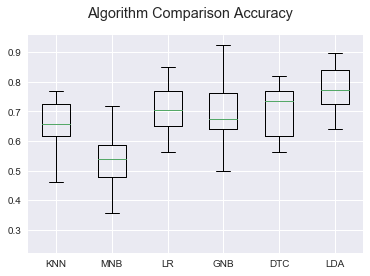

In [53]:
#Compare each of the algorithms

#Prepare configuration for cross validation test harness
seed = 7
neigh_num = 3

#Prepare models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors= neigh_num)))
models.append(('MNB', MultinomialNB()))
models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))

#Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

KNN: 0.618990 (0.137101)
MNB: 0.588917 (0.109083)
LR: 0.677855 (0.085778)
GNB: 0.664197 (0.135820)
DTC: 0.653324 (0.087410)
LDA: 0.789050 (0.078256)


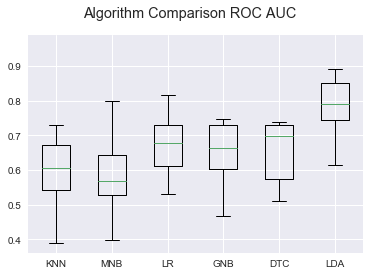

In [54]:
#Compare each of the algorithms

#Prepare models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=neigh_num)))
models.append(('MNB', MultinomialNB()))
models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))

#Evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison ROC AUC')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

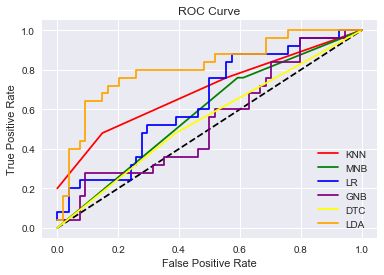

KNN ROC AUC: 0.69
MNB ROC AUC: 0.58
LR  ROC AUC: 0.64
GNB ROC AUC: 0.54
DTC ROC AUC: 0.55
LDA ROC AUC: 0.81


In [55]:
#ROC Curves

#KNN
knn_pred_prob = knn.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, knn_pred_prob)

#MNB
mnb_pred_prob = clf.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, mnb_pred_prob)

#LR
lr_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, lr_pred_prob)

#GNB
gnb_pred_prob = clf_GNB.predict_proba(X_test)[:,1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, gnb_pred_prob)

#LDA
lda_pred_prob = clf_LDA.predict_proba(X_test)[:,1]
fpr5, tpr5, thresholds5 = roc_curve(y_test, lda_pred_prob)

#DTC
dtc_pred_prob = tree.predict_proba(X_test)[:,1]
fpr6, tpr6, thresholds6 = roc_curve(y_test, dtc_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, color='red', label= 'KNN')
plt.plot(fpr2, tpr2, color='green', label= 'MNB')
plt.plot(fpr3, tpr3, color='blue', label= 'LR')
plt.plot(fpr4, tpr4, color='purple', label= 'GNB')
plt.plot(fpr6, tpr6, color='yellow', label= 'DTC')
plt.plot(fpr5, tpr5, color='orange', label= 'LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

#AUC Scores
#KNN
roc_auc_knn = roc_auc_score(y_test, knn_pred_prob)
print ("KNN ROC AUC:", "{:.2f}".format(roc_auc_knn))

#MNB
roc_auc_mnb = roc_auc_score(y_test, mnb_pred_prob)
print ("MNB ROC AUC:", "{:.2f}".format(roc_auc_mnb))

#LR
roc_auc_lr = roc_auc_score(y_test, lr_pred_prob)
print ("LR  ROC AUC:", "{:.2f}".format(roc_auc_lr))

#GNB
roc_auc_gnb = roc_auc_score(y_test, gnb_pred_prob)
print ("GNB ROC AUC:", "{:.2f}".format(roc_auc_gnb))

#DTC
roc_auc_dtc = roc_auc_score(y_test, dtc_pred_prob)
print ("DTC ROC AUC:", "{:.2f}".format(roc_auc_dtc))

#LDA
roc_auc_lda = roc_auc_score(y_test, lda_pred_prob)
print ("LDA ROC AUC:", "{:.2f}".format(roc_auc_lda))

## Correlation Analysis

In [56]:
model_df.corr()

,Users Yesterday,Avg. Users last 7 days,Bounce Rate Yesterday,Pages/Sess Yesterday,Avg. Sess Dur Sec Yesterday,Users LY,Bounce Rate LY,Pages / Sess LY,Avg. Sess LY,Daily Revenue Demand Plan,...,Sale Day,"('Spend Yesterday', '')","('Spend LY', '')",Rev Goal Reached,Rev Goal Reached Yesterday,Users Goal Reached Yesterday,Orders Goal Reached Yesterday,Units Goal Reached Yesterday,AOV Goal Reached Yesterday,CVR Goal Reached Yesterday
Users Yesterday,1.000000,0.711537,-0.119047,0.495442,0.461018,0.333055,-0.092227,0.371105,0.337603,0.548564,...,0.204731,0.656456,0.355793,0.176909,0.222602,0.222017,0.277742,0.280701,-0.128086,0.015312
Avg. Users last 7 days,0.711537,1.000000,-0.055193,0.367805,0.253631,0.395022,-0.192935,0.321678,0.241622,0.501050,...,0.072698,0.617697,0.315345,0.000711,0.050334,0.051473,0.121722,0.129534,-0.098877,-0.030461
Bounce Rate Yesterday,-0.119047,-0.055193,1.000000,-0.643008,-0.597185,-0.105299,0.095788,-0.097072,-0.039850,-0.202686,...,-0.123230,-0.152419,0.025850,0.004849,-0.054013,0.081307,-0.063155,-0.032882,0.054016,-0.130277
Pages/Sess Yesterday,0.495442,0.367805,-0.643008,1.000000,0.930015,0.293236,-0.201043,0.374869,0.323880,0.431865,...,0.225944,0.394908,0.225631,0.180466,0.214580,0.020353,0.262242,0.266012,-0.090476,0.199450
Avg. Sess Dur Sec Yesterday,0.461018,0.253631,-0.597185,0.930015,1.000000,0.241727,-0.170262,0.347986,0.332708,0.399101,...,0.304201,0.339709,0.152075,0.149644,0.187680,-0.005271,0.222437,0.230695,-0.067791,0.213527
Users LY,0.333055,0.395022,-0.105299,0.293236,0.241727,1.000000,-0.519391,0.397471,0.405138,0.539176,...,-0.005858,0.333604,0.564324,-0.068214,-0.053111,0.058229,-0.011598,-0.012389,-0.034548,-0.064095
Bounce Rate LY,-0.092227,-0.192935,0.095788,-0.201043,-0.170262,-0.519391,1.000000,-0.253084,-0.118873,-0.150812,...,0.041668,-0.132186,-0.242963,0.155403,0.105406,-0.017751,0.063959,0.078677,0.092922,0.035875
Pages / Sess LY,0.371105,0.321678,-0.097072,0.374869,0.347986,0.397471,-0.253084,1.000000,0.906652,0.483685,...,0.242007,0.303051,0.249652,-0.051670,-0.076101,0.050804,-0.020453,-0.052513,-0.037181,-0.104786
Avg. Sess LY,0.337603,0.241622,-0.039850,0.323880,0.332708,0.405138,-0.118873,0.906652,1.000000,0.480380,...,0.230326,0.216435,0.246862,-0.032204,-0.033949,0.053088,-0.004284,-0.038300,0.023660,-0.120614
Daily Revenue Demand Plan,0.548564,0.501050,-0.202686,0.431865,0.399101,0.539176,-0.150812,0.483685,0.480380,1.000000,...,0.291835,0.515176,0.383343,-0.077271,-0.072398,-0.025923,-0.005573,0.002492,-0.099954,-0.044412


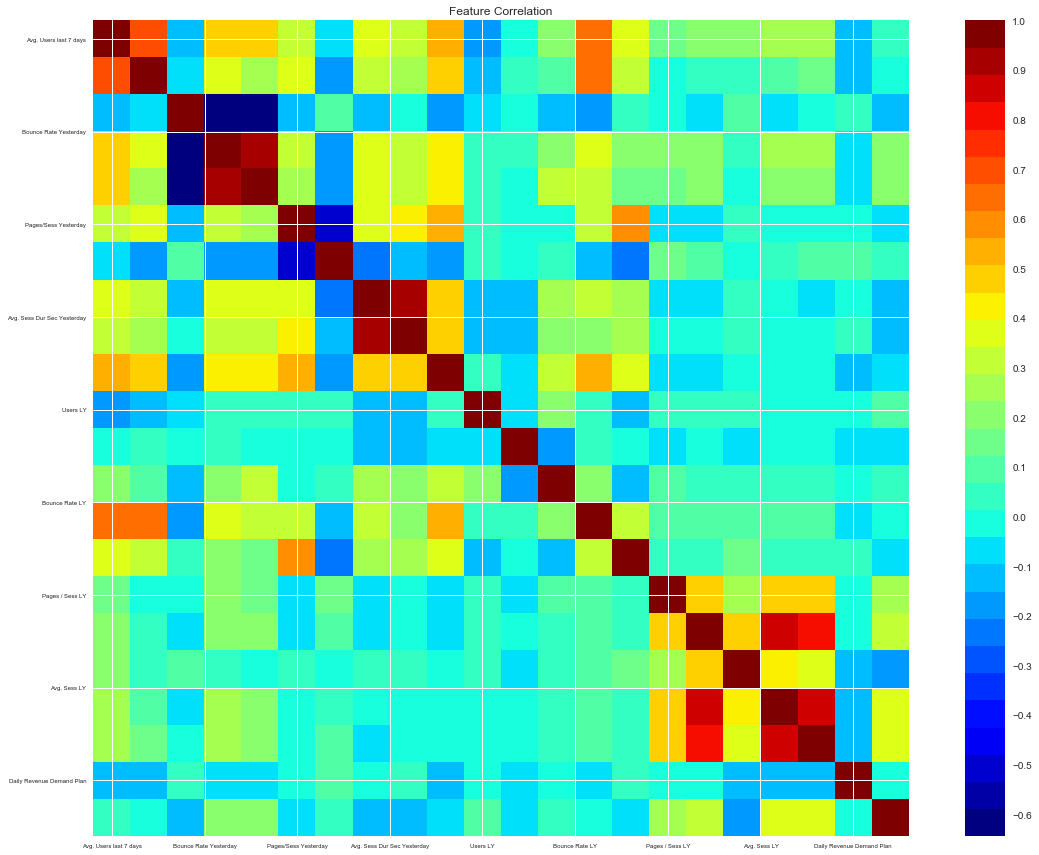

In [57]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels= df.columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
#Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-.7, -.6, -.5,-.4, -.3, -.2, -.1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
    plt.show()

correlation_matrix(model_df)

In [58]:
corr = model_df.corr()

indices = np.where(corr >= 0.90)
indices = [(model_df.columns[x], model_df.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
print(indices)

[('Pages/Sess Yesterday', 'Avg. Sess Dur Sec Yesterday'), ('Pages / Sess LY', 'Avg. Sess LY')]


In [59]:
import statsmodels.formula.api as sm
#Code for VIF Calculation

#Writing a function to calculate the VIF values

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
        
#Calculating VIF values using that function
vif_cal(input_data=model_df, dependent_col="Rev Goal Reached")

Users Yesterday  VIF =  3.61
Avg. Users last 7 days  VIF =  2.82
Bounce Rate Yesterday  VIF =  2.16
Pages/Sess Yesterday  VIF =  11.66
Avg. Sess Dur Sec Yesterday  VIF =  9.69
Users LY  VIF =  2.74
Bounce Rate LY  VIF =  1.75
Pages / Sess LY  VIF =  7.86
Avg. Sess LY  VIF =  7.91
Daily Revenue Demand Plan  VIF =  2.43
Email Day  VIF =  1.25
NA  VIF =  1.08
Sale Day  VIF =  1.42
('Spend Yesterday', '')  VIF =  2.26
('Spend LY', '')  VIF =  1.77
Rev Goal Reached Yesterday  VIF =  4.23
Users Goal Reached Yesterday  VIF =  1.68
Orders Goal Reached Yesterday  VIF =  6.0
Units Goal Reached Yesterday  VIF =  5.32
AOV Goal Reached Yesterday  VIF =  1.16
CVR Goal Reached Yesterday  VIF =  1.5
